In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv("../../../csv/v2/030_yonge_count_processed.csv.zip")
df.head()

,_id,location,lng,lat,time_end,total_count,distance_from_point,end_hour,end_minute,end_day_of_week
0,1,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2020-01-08 07:45:00,207,3.710382,7,45,2
1,2,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2020-01-08 08:00:00,187,3.710382,8,0,2
2,3,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2020-01-08 08:15:00,218,3.710382,8,15,2
3,4,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2020-01-08 08:30:00,260,3.710382,8,30,2
4,5,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2020-01-08 08:45:00,232,3.710382,8,45,2


# Separate datetime into multiple date-related attributes

In [3]:
df["time_end"] = pd.to_datetime(df["time_end"],utc=True)
df["year"] = df["time_end"].dt.year
df["month"] = df["time_end"].dt.month
df["day"] = df["time_end"].dt.day
df["dow"] = df["time_end"].dt.day_name()
df["time_of_day"] = df["time_end"].dt.time
df["hour"] = df["time_end"].dt.hour
df.head()

,_id,location,lng,lat,time_end,total_count,distance_from_point,end_hour,end_minute,end_day_of_week,year,month,day,dow,time_of_day,hour
0,1,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2020-01-08 07:45:00+00:00,207,3.710382,7,45,2,2020,1,8,Wednesday,07:45:00,7
1,2,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2020-01-08 08:00:00+00:00,187,3.710382,8,0,2,2020,1,8,Wednesday,08:00:00,8
2,3,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2020-01-08 08:15:00+00:00,218,3.710382,8,15,2,2020,1,8,Wednesday,08:15:00,8
3,4,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2020-01-08 08:30:00+00:00,260,3.710382,8,30,2,2020,1,8,Wednesday,08:30:00,8
4,5,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2020-01-08 08:45:00+00:00,232,3.710382,8,45,2,2020,1,8,Wednesday,08:45:00,8


# ANOVA (Analysis Of Variance) test
- Null hypothesis: numerical and categorical values are not correlated
- P-value: The probability of Null hypothesis being true
- Accept Null hypothesis if P-value>0.05. Means variables are NOT correlated
- Reject Null hypothesis if P-value<0.05. Means variables are correlated

In [4]:
from scipy.stats import f_oneway

## Between count (numerical) and day of week (categorical)

In [5]:
category_group_lists = df[["total_count","dow"]].groupby('dow')['total_count'].apply(list)
anova_results = f_oneway(*category_group_lists)
print("P-value:",anova_results[1])
print("Count and day of week are NOT correlated") if anova_results[1] > 0.05 else print("Count and day of week ARE correlated")

P-value: 0.0
Count and day of week ARE correlated


- P-value: 0.0
- Count and day of week ARE correlated

## Between count (numerical) and detector location (categorical)

In [6]:
category_group_lists = df[["total_count","location"]].groupby('location')['total_count'].apply(list)
anova_results = f_oneway(*category_group_lists)
print("P-value:",anova_results[1])
print("Count and detector location are NOT correlated") if anova_results[1] > 0.05 else print("Count and detector location ARE correlated")

P-value: 0.0
Count and detector location ARE correlated


## Between count (numerical) and day of week and detector location (categorical)

In [7]:
category_group_lists = df[["total_count","dow", "location"]].groupby(["dow","location"])['total_count'].apply(list)

anova_results = f_oneway(*category_group_lists)

print("P-value:",anova_results[1])
print("Count and day of week are NOT correlated") if anova_results[1] > 0.05 else print("Count and day of week ARE correlated")

P-value: 0.0
Count and day of week ARE correlated


# Calculate Pearson correlation of numerical features

In [8]:
data_to_correlate = df[["total_count","month","day","hour"]]

corr_mat = data_to_correlate.corr()

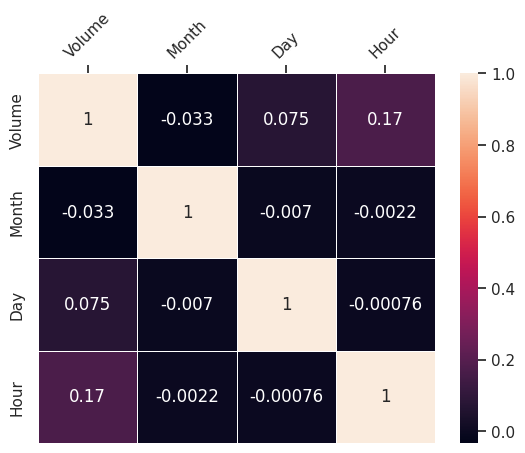

In [9]:
labels=["Volume", "Month", "Day", "Hour"]

ax = sns.heatmap(corr_mat,annot=True,linewidth=0.5,xticklabels=labels,yticklabels=labels)
ax.xaxis.tick_top()
plt.xticks(rotation=45)

plt.savefig("./plots/020_correlations.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/020_correlations.png", bbox_inches="tight")
plt.savefig("./plots/020_correlations.pdf", bbox_inches="tight")